# This is incomplete, just submitted a copy so I could review what I have with number 1 and talk about how to approach number 2 during mentor call. 

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ultimate Data Science Challenge
## Problem 1

In [2]:
#read in logins.json
with open('./logins.json', 'r') as f:
    logins = json.load(f)

In [3]:
#view logins structure
print(logins.keys())

dict_keys(['login_time'])


In [4]:
print(len(logins['login_time']))

93142


In [5]:
#create pandas series object
lg_times = pd.Series(logins['login_time'])
#view datetime format
lg_times.head()

0    1970-01-01 20:13:18
1    1970-01-01 20:16:10
2    1970-01-01 20:16:37
3    1970-01-01 20:16:36
4    1970-01-01 20:26:21
dtype: object

In [6]:
#convert to datetime object and sort values (ascending)
lg_times = pd.to_datetime(lg_times, format = "%Y-%m-%d %H:%M:%S")
lg_times = lg_times.sort_values()

My methodology for binning the logins into $15$ minute intervals will be simple: create a dummy dataframe with one feature, count, that is the same length as the DatetimeIndex I have created, assign the DatetimeIndex as the index of this dataframe, and use the resample function to bin login times into $15$ minute intervals. 

In [7]:
#aggregate login times into 15 minute bins 
dummy = [1] * len(lg_times)
login_counts15min = pd.DataFrame(dummy, index = lg_times).rename(columns = {0 : 'logins'}).resample('15T').sum()
#view head to ensure structure is correct
login_counts15min.head()

,logins
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


# Average Peak Times (daily)
In order to isolate peak times, I will downsample from $15$ minute intervals to hourly intervals and plot average logins during that particular hour of the day, and then I will perform the same calculations using 15 minute intervals for a closer look at 

In [8]:
hourly_logins = login_counts15min.resample('H').sum()
#assign hour feature
hourly_logins['hour'] = pd.DatetimeIndex(hourly_logins.index).hour
#take mean value over hour groups
hourly_avgs = hourly_logins.groupby(['hour']).mean()

In [9]:
#assign minute and hour features
login_counts15min['minute'] = pd.DatetimeIndex(login_counts15min.index).minute
login_counts15min['hour'] = pd.DatetimeIndex(login_counts15min.index).hour

#get averages of 15 minute increment activity 
avgs_15min = login_counts15min.groupby(['hour', 'minute']).mean()

#generate index for easier readability for minute/hour plot
index = ['{}:{}'.format(str(i[0]), str(i[1])) for i in avgs_15min.index]
for i in range(len(index)):
    if ':0' in index[i]:
        index[i] = index[i].replace(':0', ':00')
        

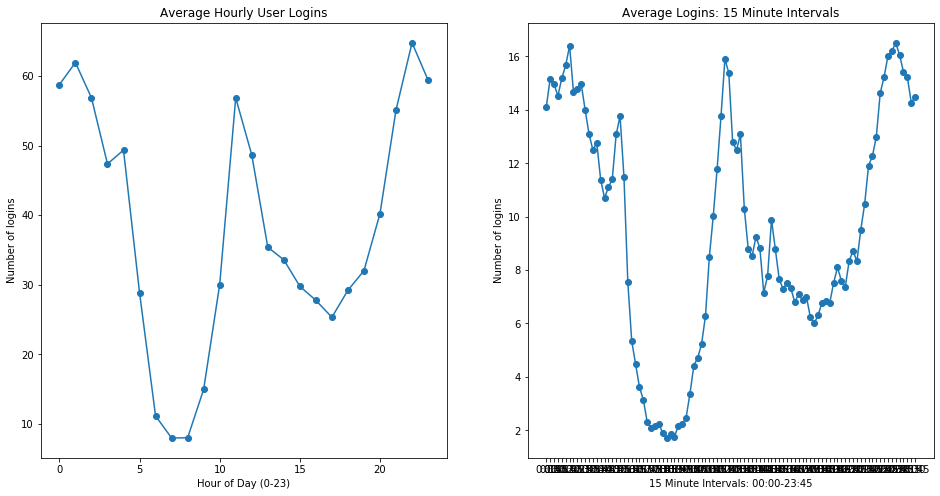

In [13]:
#plot hourly averages
fig, ax = plt.subplots(1, 2, figsize = (16, 8), sharex = False, sharey = False)
points = ax[0].scatter(x = hourly_avgs.index, y = hourly_avgs.logins)
line = ax[0].plot(hourly_avgs.index, hourly_avgs.logins)
ax[0].set_title('Average Hourly User Logins')
ax[0].set_xlabel('Hour of Day (0-23)')
ax[0].set_ylabel('Number of logins')

#plot 15 minute interval averages
points2 = ax[1].scatter(x = index, y = avgs_15min)
line2 = ax[1].plot(index, avgs_15min)
ax[1].set_title('Average Logins: 15 Minute Intervals')
ax[1].set_xlabel('15 Minute Intervals: 00:00-23:45')
ax[1].set_ylabel('Number of logins');

# Peak Days of Week 
After looking at peak times at a daily level, it may be beneficial to analyze which days of the week are the most active. 

In [20]:
#downsample to daily observations, extract day of week, groupby day of week and average over data
daily_observations = login_counts15min.drop(columns = ['minute', 'hour']).resample('D').sum()

daily_observations['day_of_week'] = pd.DatetimeIndex(daily_observations.index).dayofweek

average_daily_logins = daily_observations.groupby(['day_of_week']).mean()

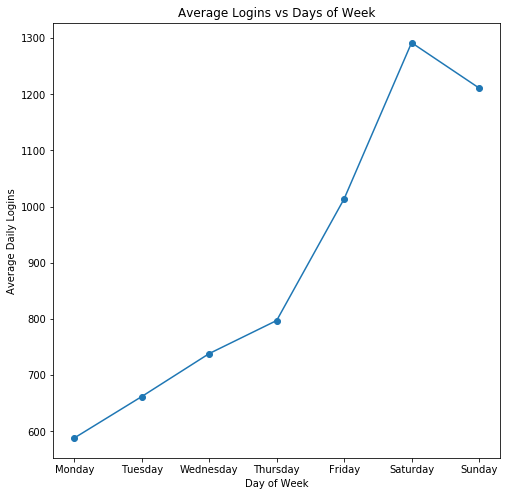

In [24]:
#name days of week in axis 
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#plot days of week versus average daily logins 
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(x = days_of_week, y = average_daily_logins)
ax.plot(days_of_week, average_daily_logins)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Daily Logins')
ax.set_title('Average Logins vs Days of Week');